## Task 2 (1)
print your student id, full and name below.

<sub>Expected answer</sub>
```
st12xxxx
Firstname Lastname
```

In [1]:
print("st124448")
print("Chen Bao")

st124448
Chen Bao


## Task 3 (1)

Continue from the Task 1, show your current version of numpy, pandas, and sklearn

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

print(f"     numpy version: {np.__version__}")
print(f"    pandas version: {pd.__version__}")
print(f"   sklearn version: {sklearn.__version__}")
print(f"matplotlib version: {mpl.__version__}")

     numpy version: 1.24.3
    pandas version: 1.5.3
   sklearn version: 1.3.0
matplotlib version: 3.7.1


## Task 4 (1)

Print a url to your `ait-ml-2023-midterm` image from `DockerHub`.

<sub>Expected answer</sub>
```
https://hub.docker.com/repository/xxxxxxxxxxxx
```

https://github.com/unknownspider1/ML_midterm2023_Chen

## Task 5 (1)
So far so good?

In the folder `dataset`, there is a file `data.csv`.
Load the file into a `Pandas` dataframe.

Take a look at the data.
It supposes to **4** columns [y,x1,x2,x3] with 200 rows.

In [3]:
df = pd.read_csv('data.csv')
df.head()

,y,x1,x2,x3
0,1,20.83,6.80,40
1,1,22.05,2.26,40
2,0,14.33,2.27,30
3,1,22.80,6.96,30
4,0,10.78,0.39,40


In [6]:
# some summary after preprocsessing
summary_stats = df.describe()
# Print the summary statistics
print(summary_stats)
# Data types of each column
data_types = df.dtypes

print(data_types)

# Count unique categories for each column
categorical_columns = ['y','x3']

for column in categorical_columns:
    unique_categories_count = df[column].nunique()
    print(f"Number of unique categories in '{column}': {unique_categories_count}")
    
# List unique categories for each categorical column
for column in categorical_columns:
    unique_categories = df[column].unique()
    print(f"Unique categories in '{column}':")
    for category in unique_categories:
        print(f"- {category}")
    print("\n")
    



                y          x1         x2          x3
count  200.000000  200.000000  200.00000  200.000000
mean     0.500000   16.048350    5.25540   25.900000
std      0.501255    5.343838    3.00317   11.261622
min      0.000000    7.680000    0.00000   10.000000
25%      0.000000   11.535000    2.70750   20.000000
50%      0.500000   15.320000    5.34000   30.000000
75%      1.000000   20.490000    7.99500   40.000000
max      1.000000   25.510000    9.96000   40.000000
y       int64
x1    float64
x2    float64
x3      int64
dtype: object
Number of unique categories in 'y': 2
Number of unique categories in 'x3': 4
Unique categories in 'y':
- 1
- 0


Unique categories in 'x3':
- 40
- 30
- 10
- 20




## Task 6 (1)

Answer the following questions

1. What is the range of each columns (min, max)?
- shown by printing the summary statstics 
2. Based on the value of each columns, which one is Discrete and which one is Category?
- y and x3 can be considered as catgorical
3. Based on the range of `y`, how many classes are there? and what are they?
- 2, 1 and 0

## Task 7 (1)

Plot three scatter plots.
- x1, x2 and color as y
- x1, x3 and color as y
- x2, x3 and color as y

<Axes: xlabel='x1', ylabel='x2'>

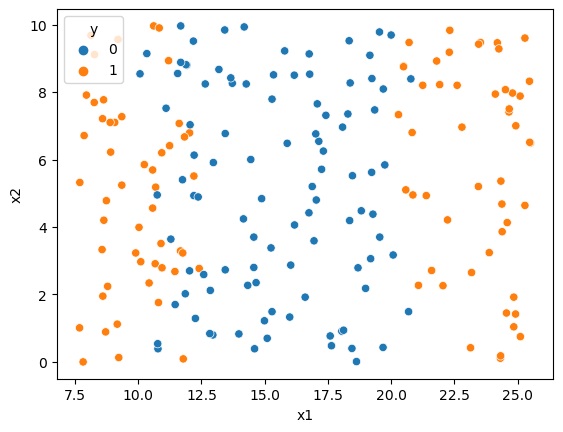

In [12]:
import seaborn
seaborn.scatterplot(x='x1', y='x2', data=df, hue='y')

<Axes: xlabel='x1', ylabel='x3'>

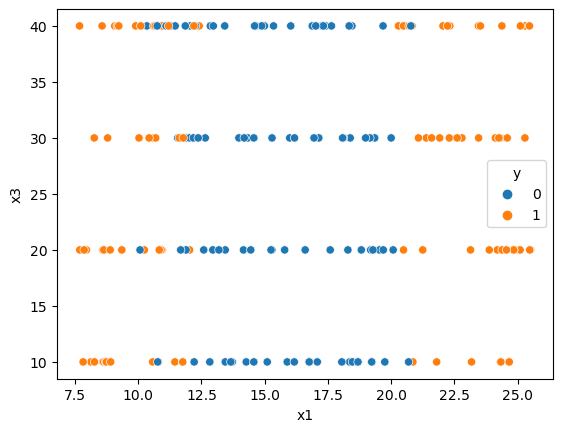

In [13]:
seaborn.scatterplot(x='x1', y='x3', data=df, hue='y')

<Axes: xlabel='x2', ylabel='x3'>

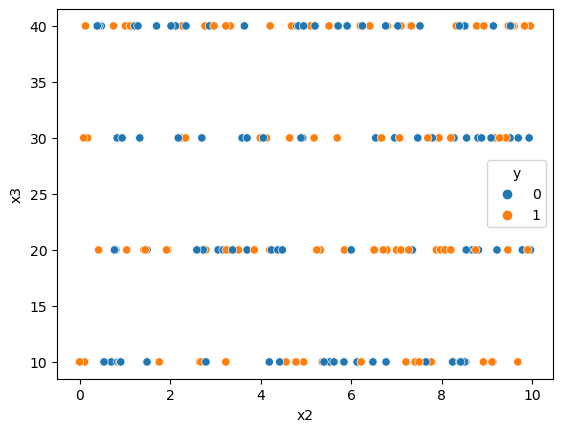

In [14]:
seaborn.scatterplot(x='x2', y='x3', data=df, hue='y')

## Task 8 (10)

Perform Exploratory Data Analysis (EDA) on the Dataset.

At the end, report which feature and classifier is best. 
(explain as best as you can. short answer get 0.)


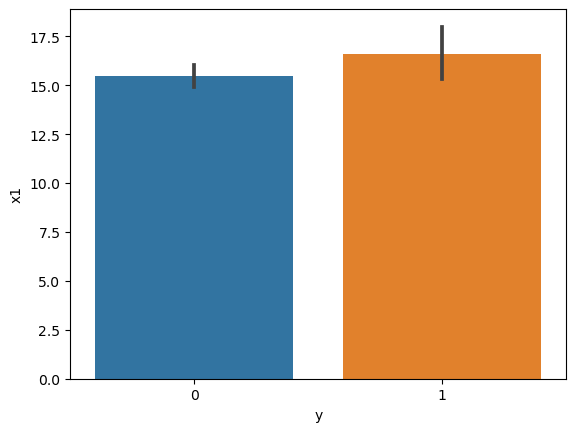

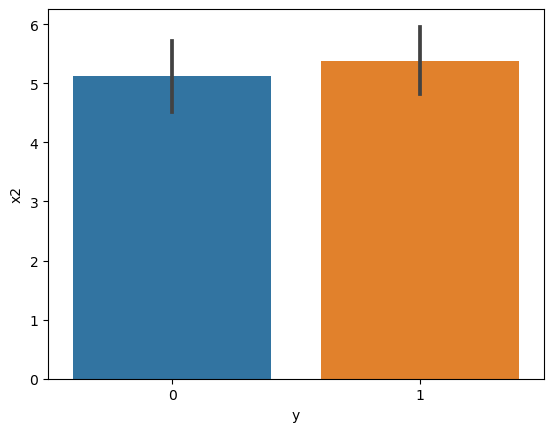

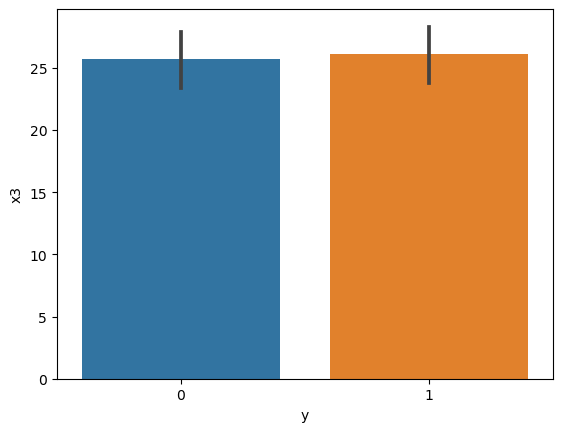

In [18]:
# barplot
seaborn.barplot(x = df['y'], y = df['x1'])
plt.show()

seaborn.barplot(x = df['y'], y = df['x2'])
plt.show()

seaborn.barplot(x = df['y'], y = df['x3'])
plt.show()

<Axes: >

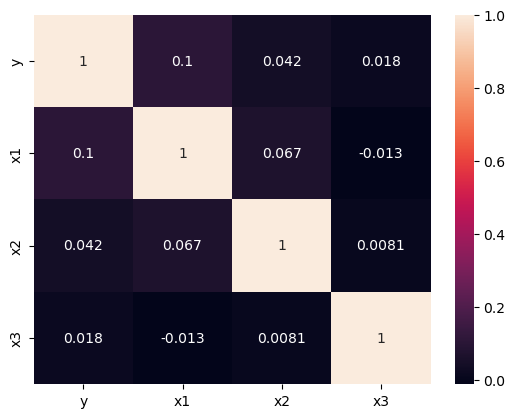

In [19]:
seaborn.heatmap(df.corr(), annot=True) 

from bar plot, y=1 have slightly higher values for x1,x2,x3, than y=0. it dosent show signigicant difference though. from the corrleation heatmap, all features have low correlation with the label y and aslo low correlations with each other. 

## Task 9 (10)

Perform Preprocessing and Data splitting (80:20).

Argue your choice. (No explanation, no score.)

*<sub>Becareful with the data leakage and imbalance data when split.</sub>*

In [20]:
#check and handle missing values

# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Count the number of rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Get the count of rows with missing values
num_rows_with_missing_values = len(rows_with_missing_values)
print("Number of rows with missing values:", num_rows_with_missing_values)

#reset the index 
df.reset_index(drop=True, inplace=True)

y     0
x1    0
x2    0
x3    0
dtype: int64
Number of rows with missing values: 0


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['y'])
y = df['y']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

print("X_train shape", X_train.shape)


X_train shape (160, 3)


## Task 10 (10)

Perform model selection to find the best model that suited this dataset.

To save you from insanity, you don't need to perform `GridSearch`.

Validate the result using accuracy, precision-recall, f1-score, and confusion matrix.

Explain the result.

In [23]:
# Model to train. You can add more if you want.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
#perform cross validation with a selected set of models, to scope down which model is among the best
#specify the list of algorithms
#this is for classification
##Baselines

from sklearn.neighbors import KNeighborsClassifier

##Complex
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.svm import SVC  #drawing a line based on maximum distance
from sklearn.ensemble import GradientBoostingClassifier  #<<-------is the MOST complex
    #XGBoost but is not in sklearn, import XGBoost #<---most powerful algorithm for tabular data (not images, signal)

#any random_state you can use......up to you 
lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [0.40625 0.59375 0.375   0.4375  0.46875] - Scores mean:  0.45625 - Scores std (lower better):  0.07551903733496608
Scores:  [0.96875 0.875   0.8125  0.84375 0.875  ] - Scores mean:  0.875 - Scores std (lower better):  0.05229125165837972
Scores:  [0.84375 0.75    0.78125 0.625   0.78125] - Scores mean:  0.75625 - Scores std (lower better):  0.0723489806424389


from the mean accuracy, it can be seen that the randomforest is the best classifier here, support vector perfomed quite well, but the logistic regression perfromed the worst

In [25]:
for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [0.53658537 0.60606061 0.44444444 0.47058824 0.48484848] - Scores mean:  0.5085054273002623 - Scores std (lower better):  0.057282928962084464
Scores:  [0.96551724 0.89473684 0.8        0.84848485 0.875     ] - Scores mean:  0.8767477863938844 - Scores std (lower better):  0.05458148659882148
Scores:  [0.8        0.75       0.72       0.5        0.74074074] - Scores mean:  0.7021481481481481 - Scores std (lower better):  0.10443824515355692


In [26]:
for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [0.78571429 0.5        0.57142857 0.44444444 0.5       ] - Scores mean:  0.5603174603174603 - Scores std (lower better):  0.11969138108894511
Scores:  [1.         0.85       0.85714286 0.77777778 0.875     ] - Scores mean:  0.871984126984127 - Scores std (lower better):  0.07207712618384311
Scores:  [0.71428571 0.6        0.64285714 0.33333333 0.625     ] - Scores mean:  0.5830952380952381 - Scores std (lower better):  0.13054134626201858


## Last Task (5)

- Export the file to PDF (4)
- Name the PDF using this format `<st12xxxx>-midterm.pdf` (1).
- Submit the PDF to the Moodle platform.

